In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('contaminatedeeg.csv')

In [17]:
def fft(x):
  x = np.asarray(x, dtype=float)
  N = x.shape[0]
  n = np.arange(N)
  k = n.reshape((N, 1))
  M = np.exp(-2j * np.pi * k * n / N)
  return np.dot(M, x)

Text(0.5, 1.0, 'FFT of EOG')

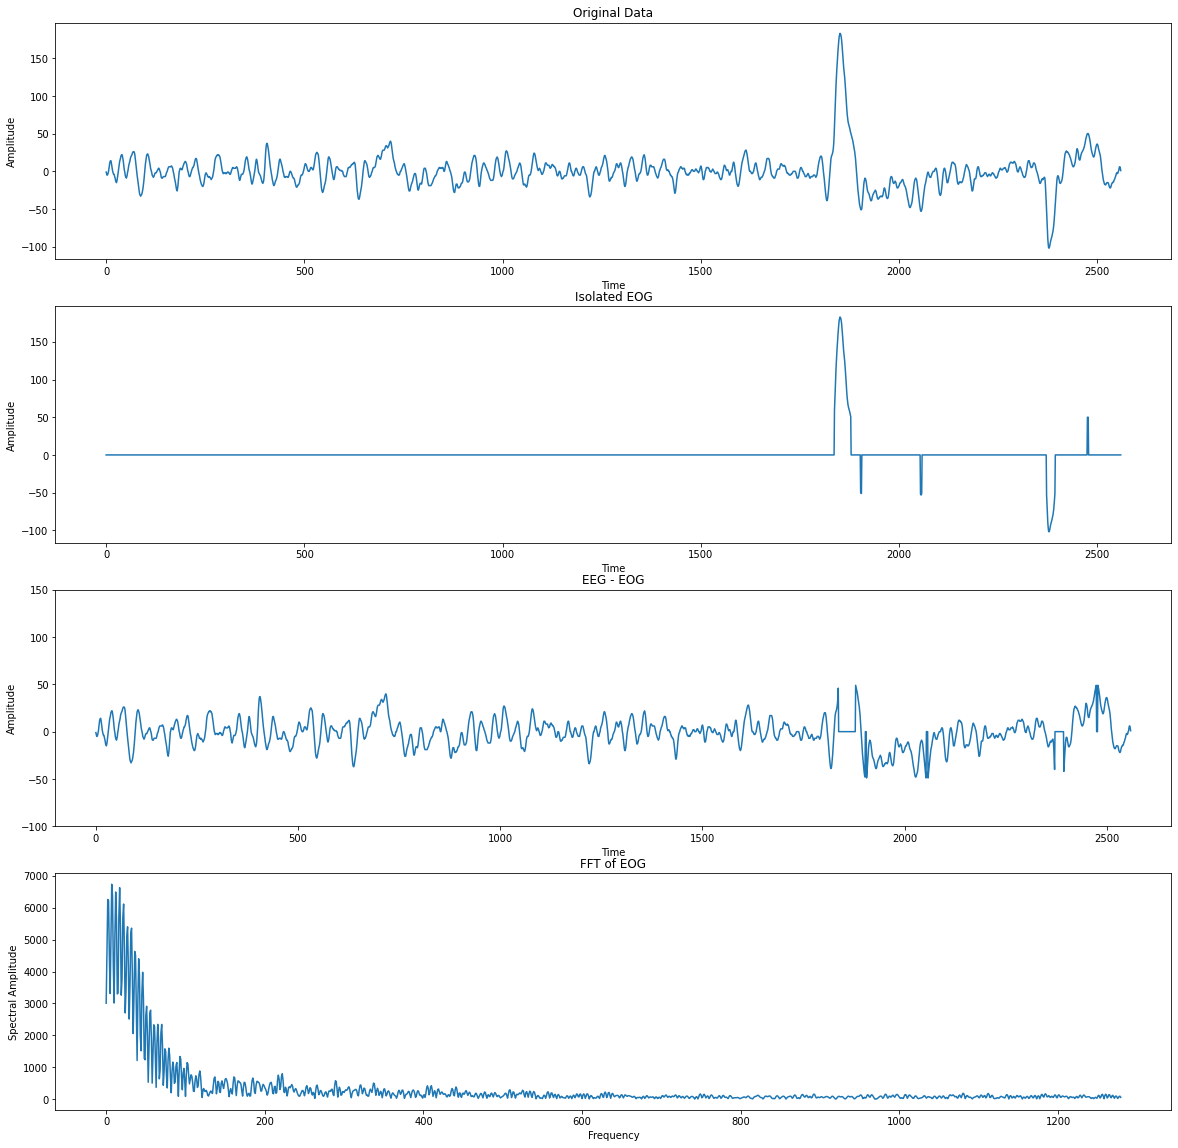

In [18]:
eog_plot = np.array(data)
eog_plot = np.where(np.logical_and(eog_plot<50,eog_plot> -50),0,eog_plot)
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Data")
plt.subplot(4,1,2)
plt.plot(eog_plot)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Isolated EOG")
plt.subplot(4,1,3)
plt.plot(data - eog_plot)
plt.axis([-100,2660,-100,150])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("EEG - EOG")
plt.subplot(4,1,4)
plt.plot(np.abs(fft(eog_plot))[:len(eog_plot)//2])
plt.xlabel("Frequency")
plt.ylabel("Spectral Amplitude")
plt.title("FFT of EOG")



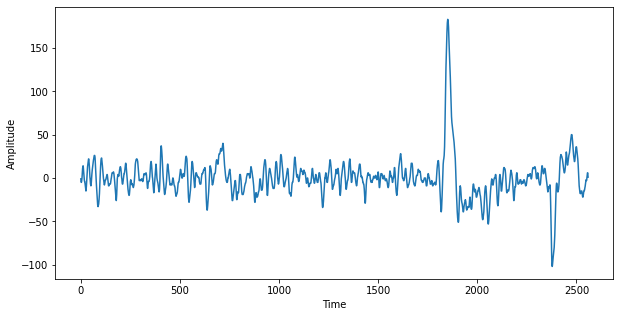

In [3]:
plt.figure(figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(data)

In [5]:
neighbors = 6
model = NearestNeighbors(n_neighbors=neighbors).fit(data)
distances, indices = model.kneighbors(data)
distance_desc = sorted(distances[:,-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc)

In [6]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),
                      distance_desc,
                      S=1.0,
                      curve="convex",
                      direction="decreasing")
kneedle.knee_y

12.0

In [7]:
dbscan = DBSCAN(eps=12,min_samples=100)
pred = dbscan.fit_predict(data)

In [8]:
data = np.array(data)
eog = np.where(pred==-1,1,0)
eog = np.multiply(eog,data.T).T


Text(0.5, 0, 'Amplitude')

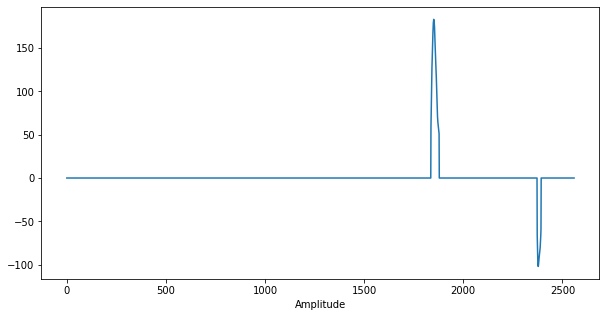

In [9]:
plt.figure(figsize=(10,5))
plt.plot(eog)
plt.xlabel("Time")
plt.xlabel("Amplitude")

Text(0.5, 1.0, 'FFT of EOG')

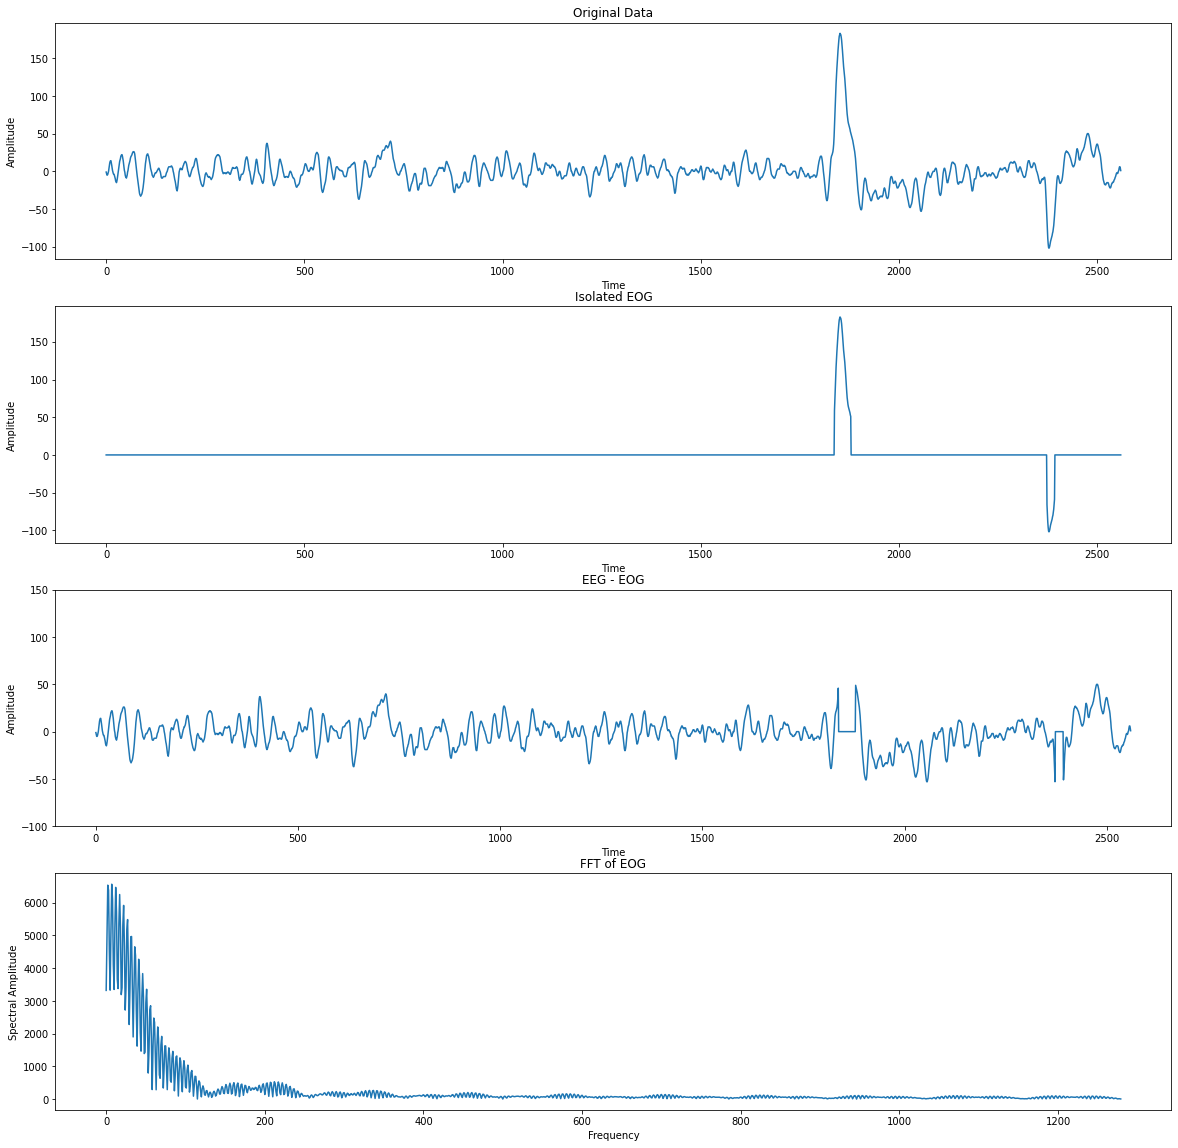

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Data")
plt.subplot(4,1,2)
plt.plot(eog)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Isolated EOG")
plt.subplot(4,1,3)
plt.plot(data - eog)
plt.axis([-100,2660,-100,150])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("EEG - EOG")
plt.subplot(4,1,4)
plt.plot(np.abs(fft(eog))[:len(eog)//2])
plt.xlabel("Frequency")
plt.ylabel("Spectral Amplitude")
plt.title("FFT of EOG")

In [11]:
print(f"Maximum Spectral Amplitude is {np.max(abs(fft(eog))):.3f}")
print(f"Minimum Spectral Amplitude is {np.min(abs(fft(eog))):.3f}")

Maximum Spectral Amplitude is 6566.802
Minimum Spectral Amplitude is 1.744
